In [1]:
import os, shutil, random, time
from pathlib import Path
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from IPython.display import display, Image

# Data Analysis

In [6]:
image_file = glob.glob('/content/drive/MyDrive/IndustrialAI/Split_Dataset/images/train/0_0_0.jpg')

if not image_file:
    print("No image files found. Please check the image file path and extension.")
else:
    # Get dimensions of the first image as an example
    try:
        with Image.open(image_file[0]) as img:
            width, height = img.size
            print(f"Image dimensions (width x height): {width} x {height}")

    except FileNotFoundError:
        print("Error: Image file not found. Please check the path.")
    except Exception as e:
        print(f"An error occurred: {e}")

Image dimensions (width x height): 1280 x 1280


In [11]:
train_img_dir = '/content/drive/MyDrive/IndustrialAI/Split_Dataset/images/train'
test_img_dir = '/content/drive/MyDrive/IndustrialAI/Split_Dataset/images/test'
val_img_dir = '/content/drive/MyDrive/IndustrialAI/Split_Dataset/images/val'

train_label_dir = '/content/drive/MyDrive/IndustrialAI/Split_Dataset/labels/train'
test_label_dir = '/content/drive/MyDrive/IndustrialAI/Split_Dataset/labels/test'
val_label_dir = '/content/drive/MyDrive/IndustrialAI/Split_Dataset/labels/val'


def count_files_in_directory(directory, extension):
    if not os.path.exists(directory):
        print(f"Warning: Directory not found: {directory}")
        return 0
    return len(glob.glob(os.path.join(directory, f'*.{extension}')))

# Count images in each split
num_train_images = count_files_in_directory(train_img_dir, 'jpg')
num_test_images = count_files_in_directory(test_img_dir, 'jpg')
num_val_images = count_files_in_directory(val_img_dir, 'jpg')

print(f"Number of images in train set: {num_train_images}")
print(f"Number of images in test set: {num_test_images}")
print(f"Number of images in val set: {num_val_images}")

# Count label files in each split
num_train_labels = count_files_in_directory(train_label_dir, 'txt')
num_test_labels = count_files_in_directory(test_label_dir, 'txt')
num_val_labels = count_files_in_directory(val_label_dir, 'txt')

print(f"\nNumber of label files in train set: {num_train_labels}")
print(f"Number of label files in test set: {num_test_labels}")
print(f"Number of label files in val set: {num_val_labels}")


Number of images in train set: 12513
Number of images in test set: 3105
Number of images in val set: 1947

Number of label files in train set: 12513
Number of label files in test set: 3105
Number of label files in val set: 1947


Number of empty label files in train set: 2057
Number of empty label files in test set: 493
Number of empty label files in validation set: 319


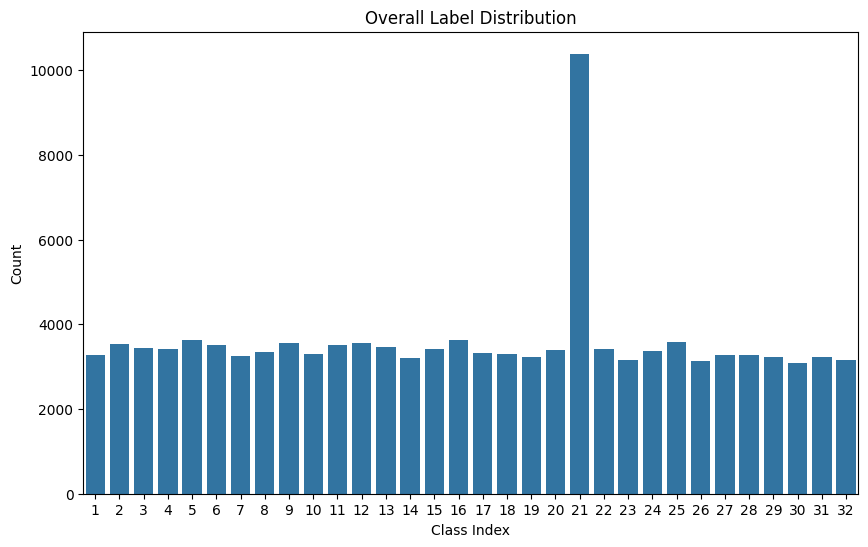

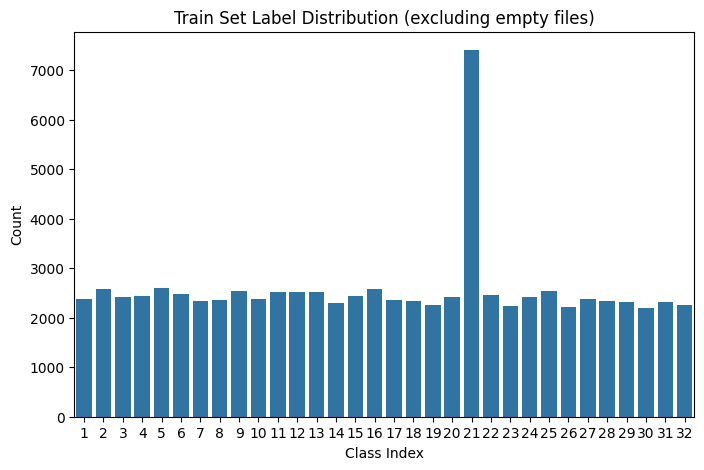

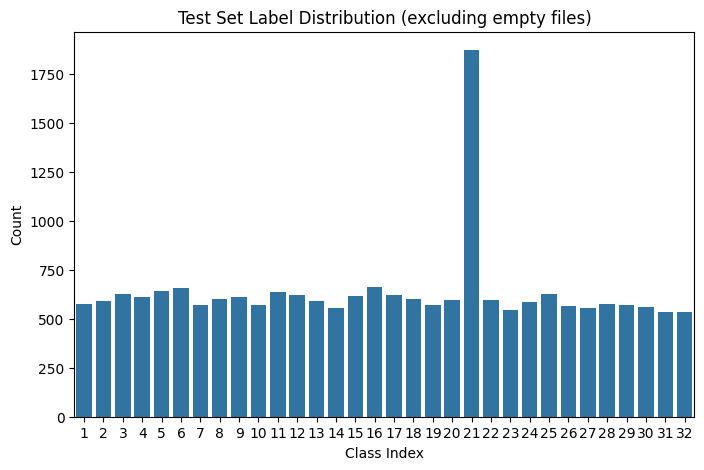

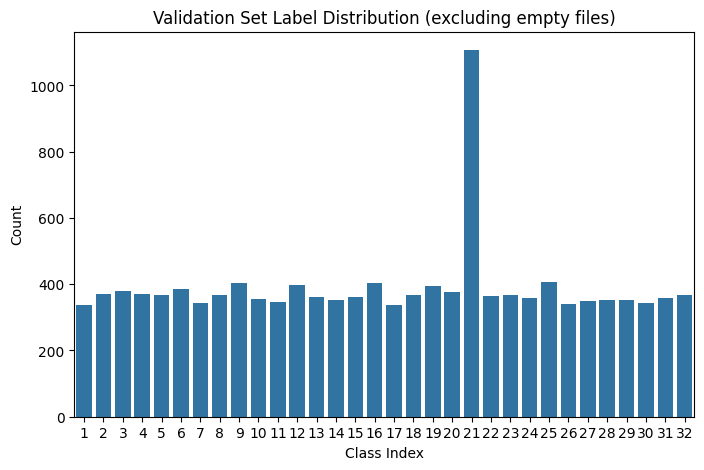

In [2]:
train_label_files = glob.glob('/content/drive/MyDrive/IndustrialAI/Split_Dataset/labels/train/*.txt')
test_label_files = glob.glob('/content/drive/MyDrive/IndustrialAI/Split_Dataset/labels/test/*.txt')
val_label_files = glob.glob('/content/drive/MyDrive/IndustrialAI/Split_Dataset/labels/val/*.txt')

def analyze_labels_and_find_empty(label_files, split_name):
    """
    Analyzes labels and finds empty label files in a list of label file paths.
    Returns a list of labels and the count of empty files.
    """
    labels = []
    empty_files_count = 0
    for label_file in label_files:
        try:
            with open(label_file, 'r') as f:
                content = f.read().strip()
                if not content:
                    empty_files_count += 1
                else:
                    # Process lines only if the file is not empty
                    for line in content.splitlines():
                         # Assuming each line in the label file starts with the class index
                        class_index = int(line.split()[0])
                        labels.append(class_index)
        except FileNotFoundError:
            print(f"Warning: Label file not found: {label_file}")
        except Exception as e:
            print(f"An error occurred while reading {label_file}: {e}")
    return labels, empty_files_count

# Analyze labels and find empty files for each split
train_labels, train_empty_count = analyze_labels_and_find_empty(train_label_files, 'train')
test_labels, test_empty_count = analyze_labels_and_find_empty(test_label_files, 'test')
val_labels, val_empty_count = analyze_labels_and_find_empty(val_label_files, 'val')
all_labels = train_labels + test_labels + val_labels

# Report empty label files
print(f"Number of empty label files in train set: {train_empty_count}")
print(f"Number of empty label files in test set: {test_empty_count}")
print(f"Number of empty label files in validation set: {val_empty_count}")


# Analyze and visualize label distribution for the entire dataset
if all_labels:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=all_labels, order=sorted(list(set(all_labels))))
    plt.title('Overall Label Distribution')
    plt.xlabel('Class Index')
    plt.ylabel('Count')
    plt.show()
else:
    print("No labels found in the dataset for overall distribution analysis (excluding empty files).")


# Analyze and visualize label distribution for each split
if train_labels:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=train_labels, order=sorted(list(set(train_labels))))
    plt.title('Train Set Label Distribution (excluding empty files)')
    plt.xlabel('Class Index')
    plt.ylabel('Count')
    plt.show()
else:
    print("No labels found in the train set for distribution analysis (excluding empty files).")

if test_labels:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=test_labels, order=sorted(list(set(test_labels))))
    plt.title('Test Set Label Distribution (excluding empty files)')
    plt.xlabel('Class Index')
    plt.ylabel('Count')
    plt.show()
else:
    print("No labels found in the test set for distribution analysis (excluding empty files).")

if val_labels:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=val_labels, order=sorted(list(set(val_labels))))
    plt.title('Validation Set Label Distribution (excluding empty files)')
    plt.xlabel('Class Index')
    plt.ylabel('Count')
    plt.show()
else:
    print("No labels found in the validation set for distribution analysis (excluding empty files).")